# Run the whole deltas algorithm

In [10]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

Breast Cancer: 569
Number of attribues: 30
Classes total: 357 - 212

Classes train: 250 - 25
Classes test:  107 - 187


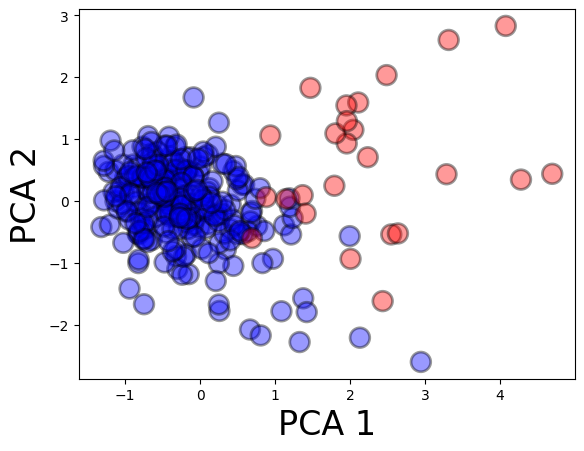

In [11]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing', 13: 'Habermans breast cancer'}
dataset = datasets[0]  # change ind to select dataset to use
model = 'SVM-rbf'

data_clf = data.get_real_dataset(dataset, scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

## Get Classifier

Tuning SVM params with 5 fold CV


Best SVM params: {'C': 10000, 'gamma': 0.001, 'kernel': 'rbf'}
Original


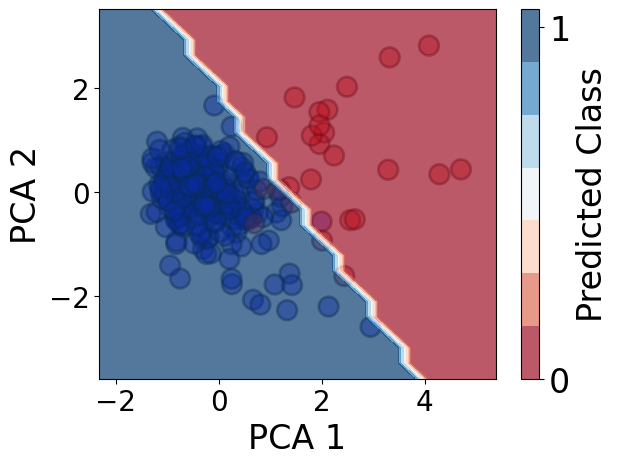

SMOTE


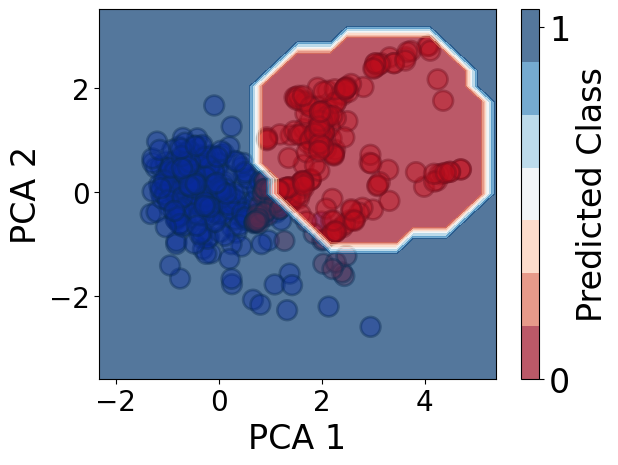

Balanced Weights


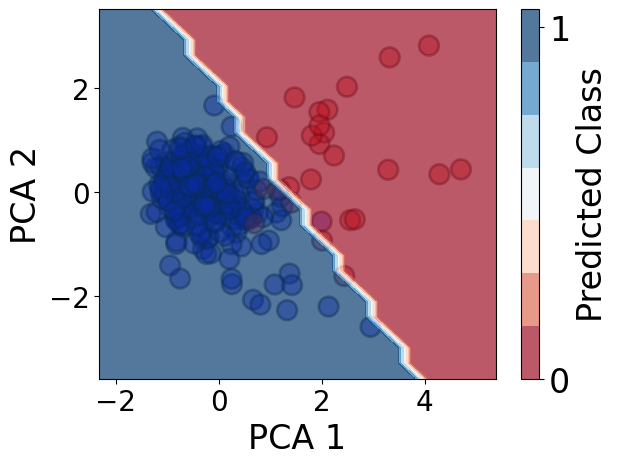

BMR


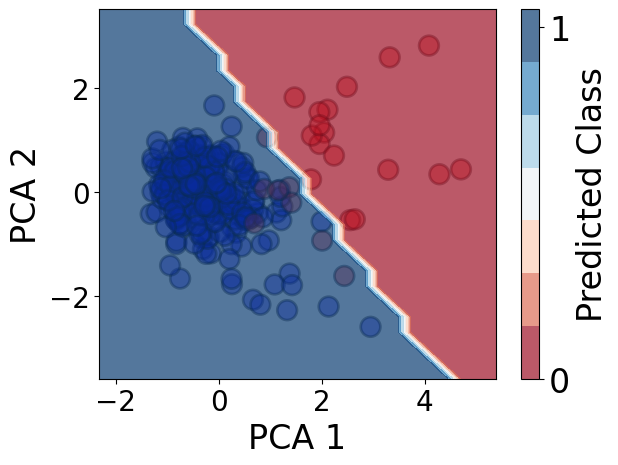

Threshold


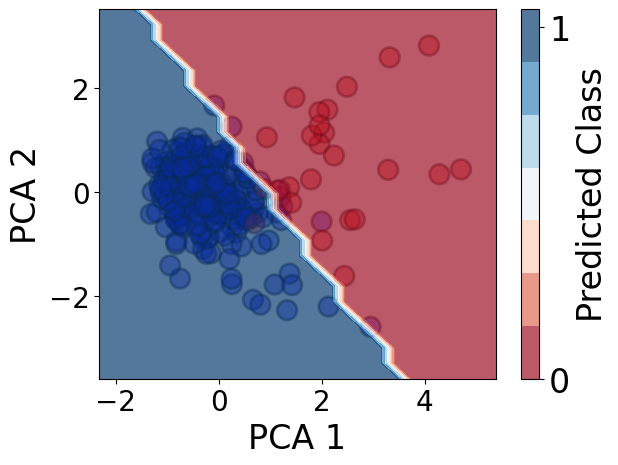

In [12]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Original']

## Fit deltas

Original Data


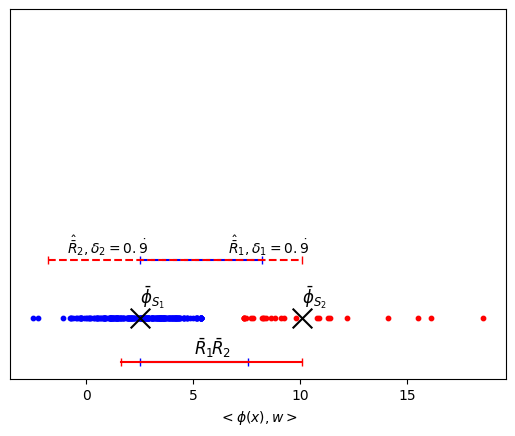

Budget 137 found 57 viable downsampled solutions
Best solution found by removing 72 data points
Downsampled Data:


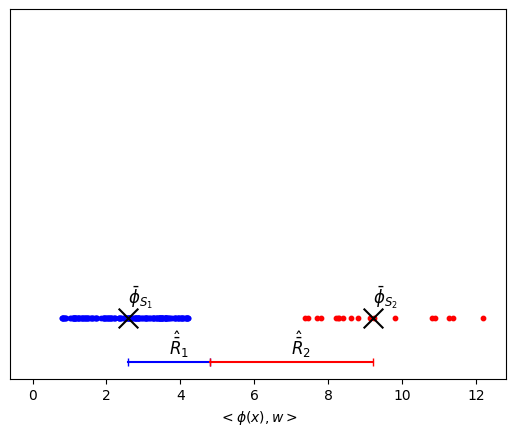

In [13]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                     max_trials=10000,
                                                     parallel=True)

## Plot training data information

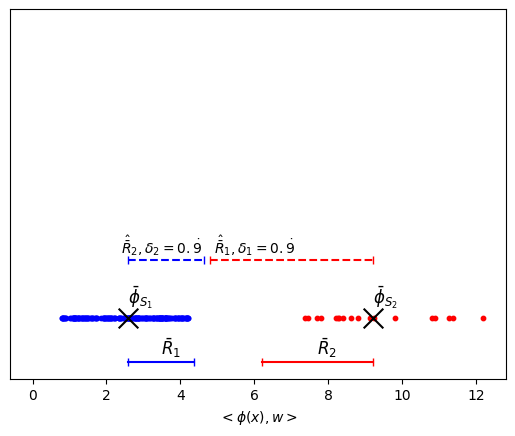

In [14]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [15]:
deltas_model.print_params()

Parameters
                R:  12.200967669591819
                N1: 185
                N2: 18
                R1: 1.7892008996733115
                R2: 2.9974206031096493
                M:  1.8320824265379159
                D:  6.618703929320876
                C1: 1
                C2: 1


# Evaluation on test data

                  Accuracy    G-Mean   ROC-AUC        F1
Method                                                  
Original          0.928571  0.942179  0.943850  0.940510
SMOTE             0.741497  0.770281  0.794792  0.746667
Balanced Weights  0.928571  0.942179  0.943850  0.940510
BMR               0.860544  0.883600  0.890374  0.876877
Threshold         0.945578  0.949128  0.949223  0.956284
Our Method        0.955782  0.944457  0.945250  0.965879 


Original


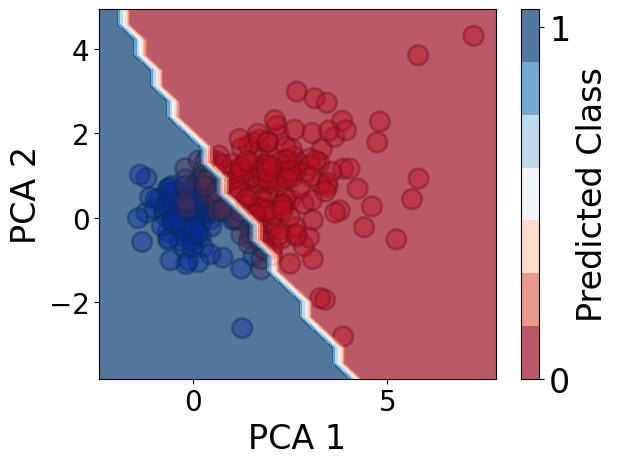

SMOTE


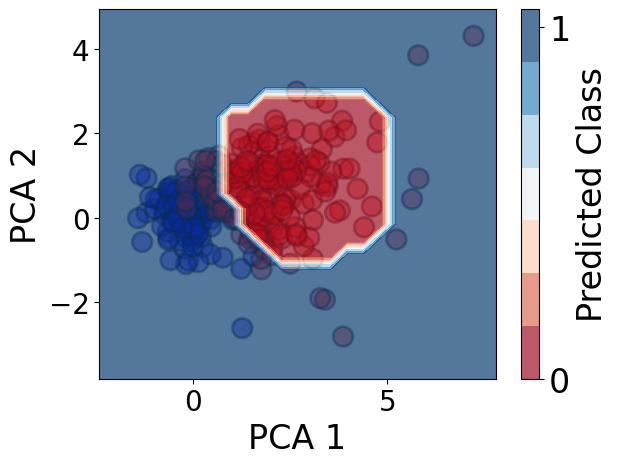

Balanced Weights


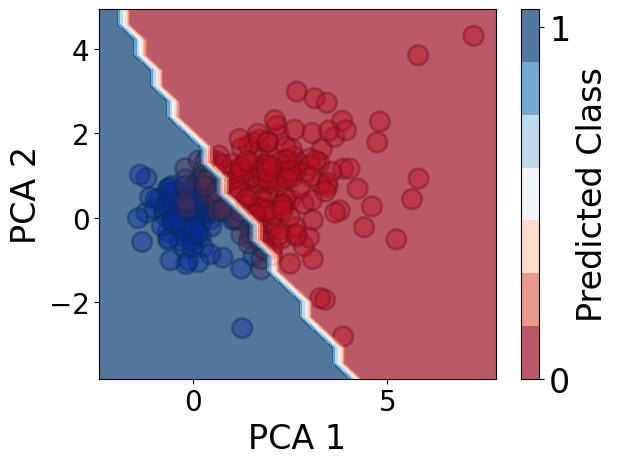

BMR


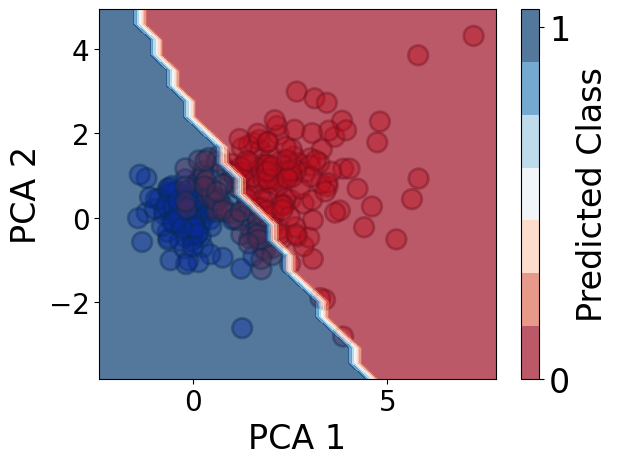

Threshold


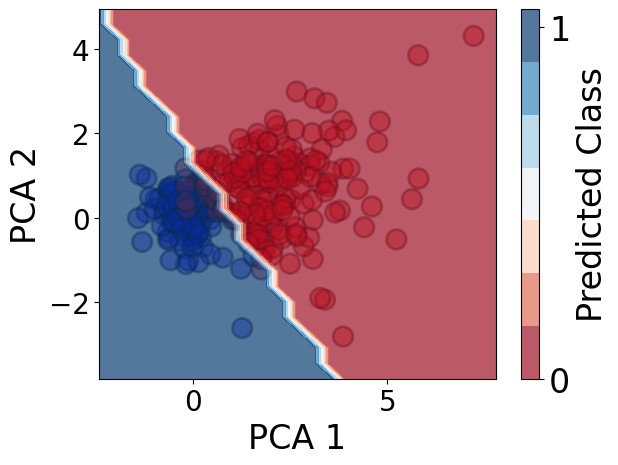

Our Method


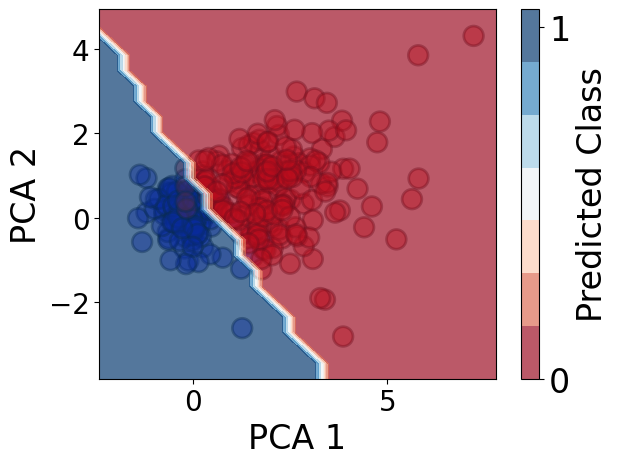

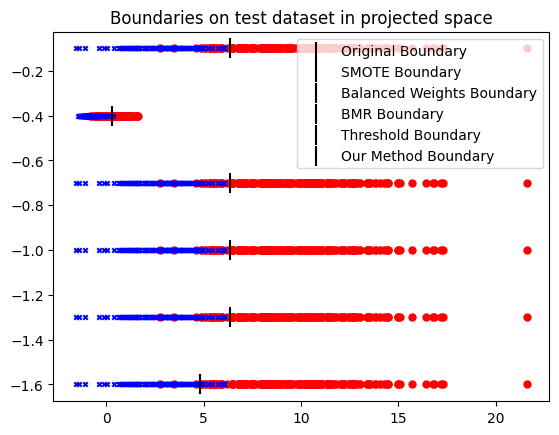

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Original & 0.9286 & 0.9422 & 0.9439 & 0.9405 \\
SMOTE & 0.7415 & 0.7703 & 0.7948 & 0.7467 \\
Balanced Weights & 0.9286 & 0.9422 & 0.9439 & 0.9405 \\
BMR & 0.8605 & 0.8836 & 0.8904 & 0.8769 \\
Threshold & 0.9456 & 0.9491 & 0.9492 & 0.9563 \\
Our Method & 0.9558 & 0.9445 & 0.9452 & 0.9659 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Original,0.928571,0.942179,0.943850,0.940510
SMOTE,0.741497,0.770281,0.794792,0.746667
Balanced Weights,0.928571,0.942179,0.943850,0.940510
BMR,0.860544,0.883600,0.890374,0.876877
Threshold,0.945578,0.949128,0.949223,0.956284
Our Method,0.955782,0.944457,0.945250,0.965879


In [16]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])